# SMS Spam Detection

### Prepared by
#### Can Çalışkan - 190254060
#### Mehmet Ağkale - 180254038
#### Emirhan Aksoy - 190254067
#### Tevfik Hacıhamdioğlu – 210254023

#### Also Github Link: https://github.com/aweras/sms_spam_detection

# Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd

# Reading the dataset we've chosen

In [2]:
df = pd.read_csv('spam.csv',encoding='latin-1')

# Checking a few samples

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3027,ham,You have got tallent but you are wasting.,NaN,NaN,NaN
4499,ham,Nvm take ur time.,NaN,NaN,NaN
3874,ham,Okie but i scared u say i fat... Then u dun wa...,NaN,NaN,NaN
525,ham,Hi i won't b ard 4 christmas. But do enjoy n m...,NaN,NaN,NaN
5511,ham,"ItÛ÷s reassuring, in this crazy world.",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


# Dropping unnecessary columns

In [6]:
df.drop(columns=['Unnamed: 2','Unnamed: 3', 'Unnamed: 4'],inplace=True)

In [7]:
df.sample(5)

,v1,v2
5337,ham,My birthday is on feb &lt;#&gt; da. .
2867,ham,"Aight, tomorrow around &lt;#&gt; it is"
3787,spam,Want to funk up ur fone with a weekly new tone...
1132,ham,Good morning princess! How are you?
3249,ham,"Babe, I need your advice"


In [8]:
df.rename(columns={'v1':'label','v2':'text'},inplace=True)

In [9]:
df.sample(5)

,label,text
4480,ham,No..its ful of song lyrics..
1623,ham,"Ah, well that confuses things, doesnÛ÷t it?"
704,ham,True dear..i sat to pray evening and felt so.s...
2037,ham,Oh sorry please its over
4593,ham,I had a good time too. Its nice to do somethin...


## Encoding label

In [10]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

## Encoding labels

In [14]:
df['label'] = encoder.fit_transform(df['label'])

In [15]:
df.sample(5)

,label,text
1545,0,"Good afternoon, my love ! Any job prospects ? ..."
837,0,"Sir, I have been late in paying rent for the p..."
1007,0,I don't quite know what to do. I still can't g...
4497,1,Latest Nokia Mobile or iPOD MP3 Player +å£400 ...
601,0,If u sending her home first it's ok lor. I'm n...


In [17]:
df.isnull().sum()

label    0
text     0
dtype: int64

In [18]:
df.duplicated().sum()

403

In [19]:
df = df.drop_duplicates(keep='first')

In [20]:
df.duplicated().sum()

0

In [17]:
df.shape

(5169, 2)

In [18]:
df['label'].value_counts()

label
0    4516
1     653
Name: count, dtype: int64

## Importing necessary libraries

In [19]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA


from sklearn.utils import resample

## Sampling the data to visualize

In [20]:
#data = df.where((pd.notnull(df)), '')
data = resample(df, replace=False, n_samples=1000, random_state=42)

## Vectorizering

In [21]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['text'])
y = df['label'].values

## Dimensionality reduction using PCA 
## Reducing the data to 2 dimensions for visualization.

In [22]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

## 2D Visualization 

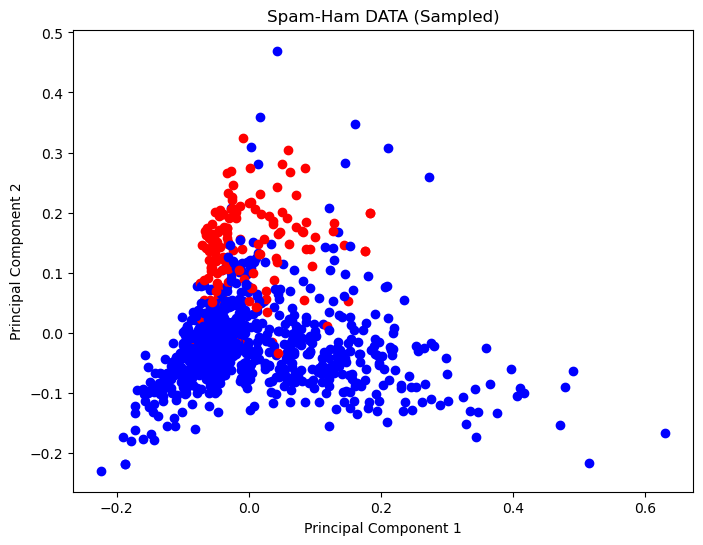

In [23]:
plt.figure(figsize=(8, 6))
colors = {0: 'blue', 1: 'red'}  # 0: Ham (blue), 1: Spam (red)
for i in range(len(X_pca)):
    label = data['label'].iloc[i]
    plt.scatter(X_pca[i, 0], X_pca[i, 1], color=colors[label], marker='o')

plt.title('Spam-Ham DATA (Sampled)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

In [25]:
x = vectorizer.fit_transform(df['text']).toarray()
y = df['label'].values

## Training

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=2)

## Models

In [44]:
#models
dtc = DecisionTreeClassifier
knn = KNeighborsClassifier
lr = LogisticRegression
rfc = RandomForestClassifier
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

## Classifier and Calculations

In [28]:
classifier_knn = knn(n_neighbors = 9, metric = 'minkowski', p = 2)
classifier_knn.fit(x_train, y_train)


KNeighborsClassifier(n_neighbors=9)

In [29]:
y_pred_knn = classifier_knn.predict(x_test)
print(accuracy_score(y_test,y_pred_knn))
print(confusion_matrix(y_test,y_pred_knn))
print(f1_score(y_test,y_pred_knn))
print(precision_score(y_test,y_pred_knn))
print(recall_score(y_test,y_pred_knn))

0.9487427466150871
[[896   0]
 [ 53  85]]
0.7623318385650223
1.0
0.6159420289855072


In [32]:
classifier_dtc = dtc(criterion = 'entropy', random_state = 0)
classifier_dtc.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [33]:
y_pred_dtc = classifier_dtc.predict(x_test)
print(accuracy_score(y_test,y_pred_dtc))
print(confusion_matrix(y_test,y_pred_dtc))
print(f1_score(y_test,y_pred_dtc))
print(precision_score(y_test,y_pred_dtc))
print(recall_score(y_test,y_pred_dtc))

0.9555125725338491
[[881  15]
 [ 31 107]]
0.8230769230769229
0.8770491803278688
0.7753623188405797


In [34]:
classifier_rfc = rfc(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier_rfc.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [35]:
y_pred_rfc = classifier_rfc.predict(x_test)
print(accuracy_score(y_test,y_pred_rfc))
print(confusion_matrix(y_test,y_pred_rfc))
print(f1_score(y_test,y_pred_rfc))
print(precision_score(y_test,y_pred_rfc))
print(recall_score(y_test,y_pred_rfc))

0.9564796905222437
[[895   1]
 [ 44  94]]
0.8068669527896996
0.9894736842105263
0.6811594202898551


In [36]:
classifier_lr = lr(random_state = 0)
classifier_lr.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [37]:
y_pred_lr = classifier_lr.predict(x_test)
print(accuracy_score(y_test,y_pred_lr))
print(confusion_matrix(y_test,y_pred_lr))
print(f1_score(y_test,y_pred_lr))
print(precision_score(y_test,y_pred_lr))
print(recall_score(y_test,y_pred_lr))

0.9535783365570599
[[895   1]
 [ 47  91]]
0.7913043478260869
0.9891304347826086
0.6594202898550725


In [38]:
classifier_gnb = gnb
classifier_gnb.fit(x_train, y_train)

GaussianNB()

In [39]:
y_pred_gnb = classifier_gnb.predict(x_test)
print(accuracy_score(y_test,y_pred_gnb))
print(confusion_matrix(y_test,y_pred_gnb))
print(f1_score(y_test,y_pred_gnb))
print(precision_score(y_test,y_pred_gnb))
print(recall_score(y_test,y_pred_gnb))

0.9110251450676983
[[823  73]
 [ 19 119]]
0.7212121212121211
0.6197916666666666
0.8623188405797102


In [40]:
classifier_mnb = mnb
classifier_mnb.fit(x_train, y_train)

MultinomialNB()

In [41]:
y_pred_mnb = classifier_mnb.predict(x_test)
print(accuracy_score(y_test,y_pred_mnb))
print(confusion_matrix(y_test,y_pred_mnb))
print(f1_score(y_test,y_pred_mnb))
print(precision_score(y_test,y_pred_mnb))
print(recall_score(y_test,y_pred_mnb))

0.9506769825918762
[[896   0]
 [ 51  87]]
0.7733333333333333
1.0
0.6304347826086957


In [42]:
classifier_bnb = bnb
classifier_bnb.fit(x_train, y_train)

BernoulliNB()

In [43]:
y_pred_bnb = classifier_bnb.predict(x_test)
print(accuracy_score(y_test,y_pred_bnb))
print(confusion_matrix(y_test,y_pred_bnb))
print(f1_score(y_test,y_pred_bnb))
print(precision_score(y_test,y_pred_bnb))
print(recall_score(y_test,y_pred_bnb))

0.9777562862669246
[[893   3]
 [ 20 118]]
0.911196911196911
0.9752066115702479
0.855072463768116
